# Melbourne In-depth Analysis
In this notebook I will explore more deeply the Melbourne Airbnb data, wiith a focus on the text data included in the `cleansed_listings` file.

#### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
from re import sub

In [3]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Data Import
The data used in this analysis is avaliable from both [kaggle](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data) and [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

In [4]:
data_calendar = pd.read_csv("Data/calendar_dec18.csv")
data_cleansed_listings = pd.read_csv("Data/cleansed_listings_dec18.csv")
data_list_sum = pd.read_csv("Data/listings_summary_dec18.csv")
data_reviews = pd.read_csv("Data/reviews_dec18.csv")

/home/anna/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (35,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#Neighbourhoods with the most listings - top 7
data_cleansed_listings["neighborhood"].value_counts()[:7]

Central Business District    3726
Southbank                    1248
St Kilda                     1085
South Yarra                  1053
Brunswick                     728
Carlton                       585
Docklands                     576
Name: neighborhood, dtype: int64

The above neighbourhoods are the 7 most common listing locations in Melbourne. 

#### Creating the mask for the following word clouds

In [6]:
#Mask Image for Wordcloud "House"
house_mask = np.array(Image.open("Img_in/House_3.png"))
house_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
"""Since the image has a bunch of 0 values to indicate the white space, 
I need to switch them to values of 255. 
This is the acceptable format for the WordCloud function."""

for i in range(len(house_mask)):
    for position, val in enumerate(house_mask[i]):
        if val == 0:
            house_mask[i][position] = 255

#### Central Business District - Neighbourhood Overview Word Cloud

In [8]:
#Subsetting data frame by neighbourhood - Central Business District
data_neighbourhood = data_cleansed_listings[data_cleansed_listings["neighborhood"] == "Central Business District"]

In [9]:
#Getting the neighbourhood overview reviews
text = " ".join(review for review in data_neighbourhood["neighborhood_overview"].astype(str))

#Using the WordCloud stopwords
#adding 'nan' to stop words, as there are some missing values
stopwords = set(STOPWORDS)
stopwords.update(["nan", "Melbourne", "CBD", "Central", "Business", "District"])

#generating the word cloud
wordcloud = WordCloud(background_color = "white", stopwords=stopwords, mask=house_mask, colormap="plasma").generate(text)

(-0.5, 781.5, 623.5, -0.5)

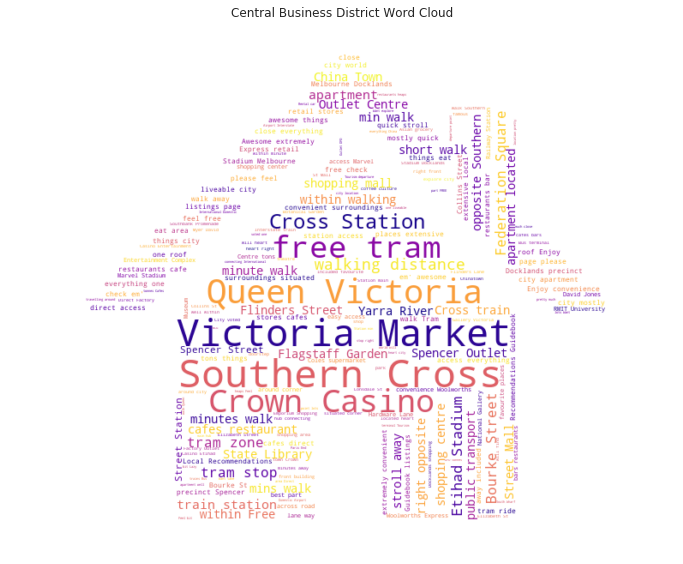

In [10]:
#plotting the word cloud
plt.figure(figsize = (12,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title("Central Business District Word Cloud")
plt.axis("off")

In [11]:
wordcloud.to_file("Img_out/CBD_wordhouse.png")

#### Southbank - Neighbourhood Overview Word Cloud

In [81]:
#Subsetting data frame by neighbourhood - Central Business District
data_neighbourhood = data_cleansed_listings[data_cleansed_listings["neighborhood"] == "Southbank"]

In [82]:
#Getting the neighbourhood overview reviews
text = " ".join(review for review in data_neighbourhood["neighborhood_overview"].astype(str))

#Using the WordCloud stopwords
#adding 'nan' to stop words, as there are some missing values
stopwords = set(STOPWORDS)
stopwords.update(["nan", "Southbank", "Melbourne"])

#generating the word cloud
wordcloud = WordCloud(prefer_horizontal=0.2, background_color = "white", stopwords=stopwords, mask=house_mask, colormap="inferno").generate(text)

(-0.5, 781.5, 623.5, -0.5)

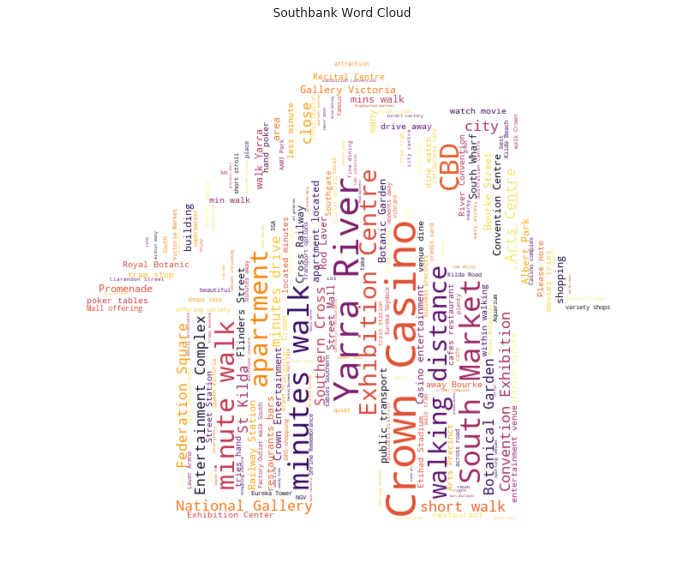

In [83]:
#plotting the word cloud
plt.figure(figsize = (12,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title("Southbank Word Cloud")
plt.axis("off")

In [84]:
wordcloud.to_file("Img_out/SB_wordhouse.png")

#### St Kilda - Neighbourhood Overview Word Cloud

In [16]:
#Subsetting data frame by neighbourhood - Central Business District
data_neighbourhood = data_cleansed_listings[data_cleansed_listings["neighborhood"] == "St Kilda"]

In [17]:
#Getting the neighbourhood overview reviews
text = " ".join(review for review in data_neighbourhood["neighborhood_overview"].astype(str))

#Using the WordCloud stopwords
#adding 'nan' to stop words, as there are some missing values
stopwords = set(STOPWORDS)
stopwords.update(["nan", "St Kilda", "St", "Kilda", "Melbourne"])

#generating the word cloud
wordcloud = WordCloud(background_color = "white", stopwords=stopwords, mask=house_mask, colormap="ocean").generate(text)

(-0.5, 781.5, 623.5, -0.5)

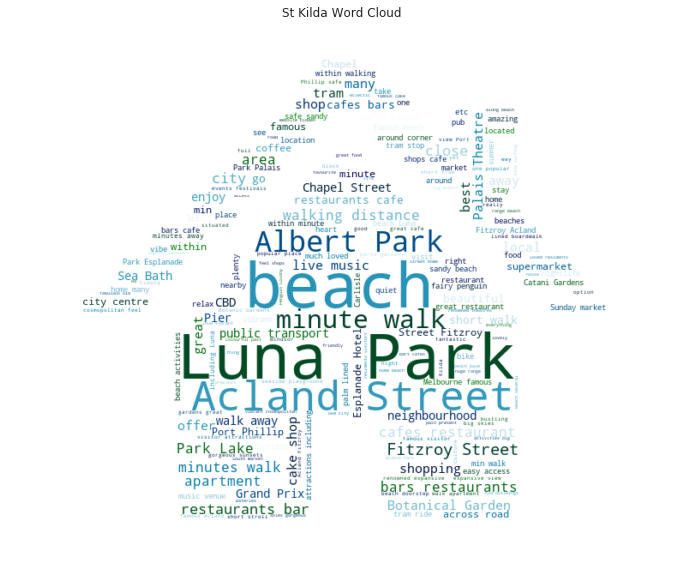

In [18]:
#plotting the word cloud
plt.figure(figsize = (12,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title("St Kilda Word Cloud")
plt.axis("off")

In [19]:
wordcloud.to_file("Img_out/StK_wordhouse.png")

#### South Yarra - Neighbourhood Overview Word Cloud

In [85]:
#Subsetting data frame by neighbourhood - Central Business District
data_neighbourhood = data_cleansed_listings[data_cleansed_listings["neighborhood"] == "South Yarra"]

In [88]:
#Getting the neighbourhood overview reviews
text = " ".join(review for review in data_neighbourhood["neighborhood_overview"].astype(str))

#Using the WordCloud stopwords
#adding 'nan' to stop words, as there are some missing values
stopwords = set(STOPWORDS)
stopwords.update(["nan", "South Yarra", "South", "Yarra", "Melbourne"])

#generating the word cloud
wordcloud = WordCloud(background_color = "white", stopwords=stopwords, mask=house_mask, colormap="Set1").generate(text)

(-0.5, 781.5, 623.5, -0.5)

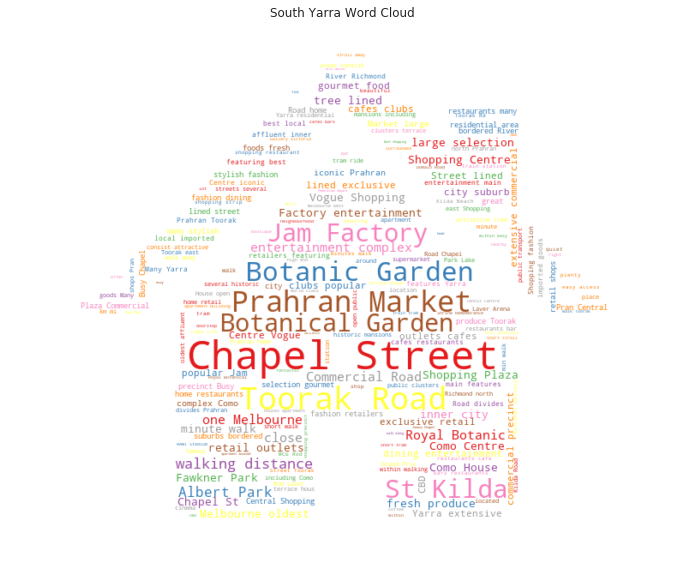

In [89]:
#plotting the word cloud
plt.figure(figsize = (12,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title("South Yarra Word Cloud")
plt.axis("off")

In [23]:
wordcloud.to_file("Img_out/SY_wordhouse.png")

#### Brunswick - Neighbourhood Overview Word Cloud

In [24]:
#Subsetting data frame by neighbourhood - Central Business District
data_neighbourhood = data_cleansed_listings[data_cleansed_listings["neighborhood"] == "Brunswick"]

In [25]:
#Getting the neighbourhood overview reviews
text = " ".join(review for review in data_neighbourhood["neighborhood_overview"].astype(str))

#Using the WordCloud stopwords
#adding 'nan' to stop words, as there are some missing values
stopwords = set(STOPWORDS)
stopwords.update(["nan", "Brunswick", "Melbourne"])

#generating the word cloud
wordcloud = WordCloud(background_color = "white", stopwords=stopwords, mask=house_mask, colormap="hot").generate(text)

(-0.5, 781.5, 623.5, -0.5)

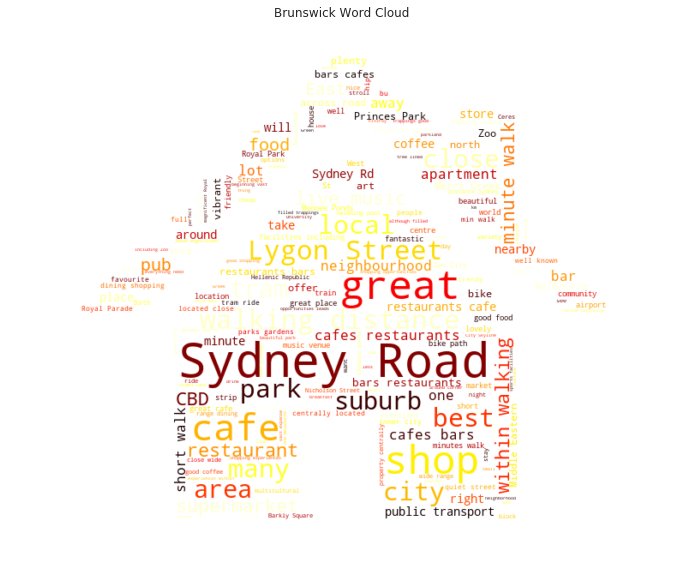

In [26]:
#plotting the word cloud
plt.figure(figsize = (12,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title("Brunswick Word Cloud")
plt.axis("off")

In [27]:
wordcloud.to_file("Img_out/Brw_wordhouse.png")